# MNIST DataSet Visualization 

There is an amazing blog about MNIS Dataset https://colah.github.io/posts/2014-10-Visualizing-MNIST/

Data set got from kaggle
https://www.kaggle.com/c/digit-recognizer/data?select=train.csv

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
do= pd.read_csv('./train.csv')
#print(do)
# Print first 5 rows
print(do.head(5))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [8]:
l=do['label']
# Drop the label and store remaining in d
d=do.drop("label", axis=1)

#now we have di --> in li

In [9]:
print(l.shape)
print(d.shape)

(42000,)
(42000, 784)


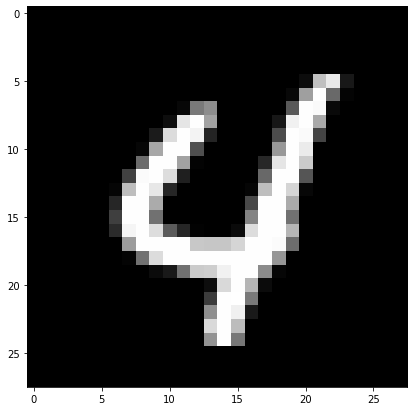

4


In [10]:
# display or plot a number
plt.figure(figsize=(7,7))
idx=122

grid_data=d.iloc[idx].to_numpy().reshape(28,28)
# imshow helps to shows pics and color map(CMAP) is the color we want to display

plt.imshow(grid_data, interpolation="none", cmap="gray")
plt.show()

print(l[idx])

In [11]:
# Pick first 15k data points to work with time fficiency

labels = l.head(15000)
data=d.head(15000)

print("the shape of the data=", data.shape)

the shape of the data= (15000, 784)


In [12]:
# Data- Preprocessing : Standardizing the data
# Which means we take each column of data and subtract from mean and divide by standard deviation
# xi-Mi/ sigma-i

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


# PCA (Manual Method)
Steps to arrive PCA:
lets take our dataset as matrix A

Step 1: Preprocess A i.e standardize the dataset.
Step 2 : Find the co-variance of the A , let's say co-variance matrix as S.
Step 3: Find the eigen values and eigen vectors for the co-variance matrix, S
Step 4 : Find the dot product of the eigen vector and co-variance matrix , S

Eigen Values - Gives us the percentange of variance of the features
Eigen Vectors - Gives us the direction of the features .


In [13]:
#find the co-varience matrix which is : A^T * A

sample_data = standardized_data

#Matrix multiplication by the numpy

covar_matrix = np.matmul(sample_data.T, sample_data)

print("the shape of the data=", covar_matrix.shape)

the shape of the data= (784, 784)


####  We are converting 784 features and projecting that into 2 features, That is why, we took top 2 (2 dimensional) eigen values

In [14]:
#Step 2 : Finding the top 2 eigen values and corresponding eigen vectors
# From Scipy. linear algebra import the function eigh
from scipy.linalg import eigh

# the parameter eigvals gives the values in ascending values
# So the top 2 (Biggest) values will be in (782,783) positions starting from 0

values,vectors =eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors",vectors.shape )

# Transpose this for easy manipulation

vectors= vectors.T

print("Shape of Updated eigen vectors",vectors.shape )

Shape of eigen vectors (784, 2)
Shape of Updated eigen vectors (2, 784)


In [15]:
# Projecting the original data sample on the plane
# formed by two principal eigen values and vectors

new_coordinates = np.matmul(vectors, sample_data.T)

#We can mulptity these two because the shape is m*n, n*m (Which is applicable for matrix multiplication)

print("Resultant new data points's shape is ", vectors.shape,"*", sample_data.T.shape, " = ", new_coordinates.shape)

Resultant new data points's shape is  (2, 784) * (784, 15000)  =  (2, 15000)


Here we converted the 784 dimension into 2

In [16]:
import pandas as pd
# Appending label to the 2nd projected data
new_coordinates = np.vstack((new_coordinates, labels)).T
#print(new_coordinates)
#creating a new data frae for ploting the labeld points

dataframe = pd.DataFrame(data=new_coordinates, columns=("1st principal","2nd Principal", "labels"))

print(dataframe.head())

   1st principal  2nd Principal  labels
0      -5.558661      -5.043558     1.0
1       6.193635      19.305278     0.0
2      -1.909878      -7.678775     1.0
3       5.525748      -0.464845     4.0
4       6.366527      26.644289     0.0


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


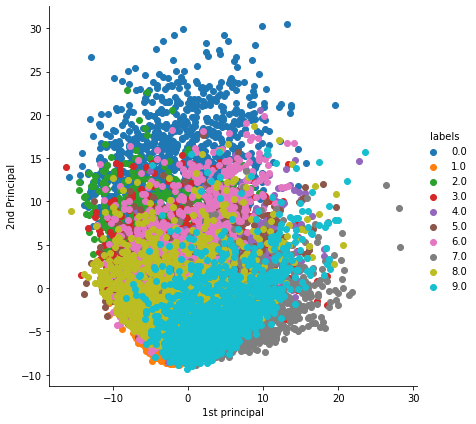

In [17]:
import seaborn as sn
sn.FacetGrid(dataframe, hue="labels", size=6).map(plt.scatter,'1st principal','2nd Principal').add_legend()
plt.show()

# PCA Using Scikit-Learn (easy Method) 

In [18]:
# initializing the PCA
from sklearn import decomposition
pca= decomposition.PCA()


#####  All things we did above manually is taken care by the below code(single line)

In [19]:
#configuring the parameters
# components = 2 , because we need 2 dimensional matrix
pca.n_components =2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain 2-d projects of simple data

print("shape of reduced data", pca_data.shape)

shape of reduced data (15000, 2)


In [20]:
import pandas as pd
# Appending label to the 2nd projected data
pca_data = np.vstack((pca_data.T, labels)).T
#print(new_coordinates)
#creating a new data frae for ploting the labeld points

dataframe = pd.DataFrame(data=pca_data, columns=("1st principal","2nd Principal", "labels"))

print(dataframe.head())



   1st principal  2nd Principal  labels
0      -5.043534      -5.558598     1.0
1      19.305306       6.193291     0.0
2      -7.678799      -1.909911     1.0
3      -0.464799       5.525211     4.0
4      26.644293       6.366507     0.0


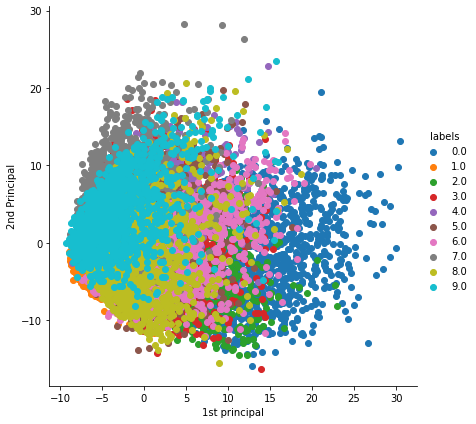

In [21]:
import seaborn as sn
sn.FacetGrid(dataframe, hue="labels", height=6).map(plt.scatter,'1st principal','2nd Principal').add_legend()
plt.show()

# T-SNE using Scikit-Learn 

In [27]:
from sklearn.manifold import TSNE

#picking top 1000 points from 15k ponts
data_1000= standardized_data[0:1000,:]
labels_1000=labels[0:1000]

model = TSNE(n_components=2, random_state=0, perplexity=100, n_iter=5000)
#default perpluxity =30 , max iteratioon=1000

tsne_data= model.fit_transform(data_1000)

pca_data = np.vstack((tsne_data.T, labels_1000)).T
#print(new_coordinates)
#creating a new data frae for ploting the labeld points

dataframe = pd.DataFrame(data=pca_data, columns=("1st","2nd", "labels"))

print(dataframe.head())


         1st        2nd  labels
0   0.851171  -4.953988     1.0
1 -21.306585  -0.503621     0.0
2   2.069388   2.506781     1.0
3   9.964005  13.416349     4.0
4 -25.637676  -0.089054     0.0


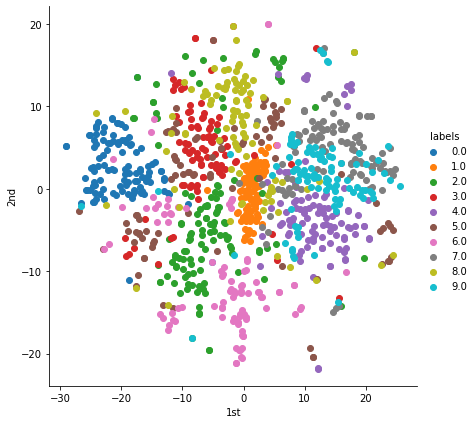

In [28]:
import seaborn as sn
sn.FacetGrid(dataframe, hue="labels", height=6).map(plt.scatter,"1st","2nd").add_legend()
plt.show()